> Sumber : https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

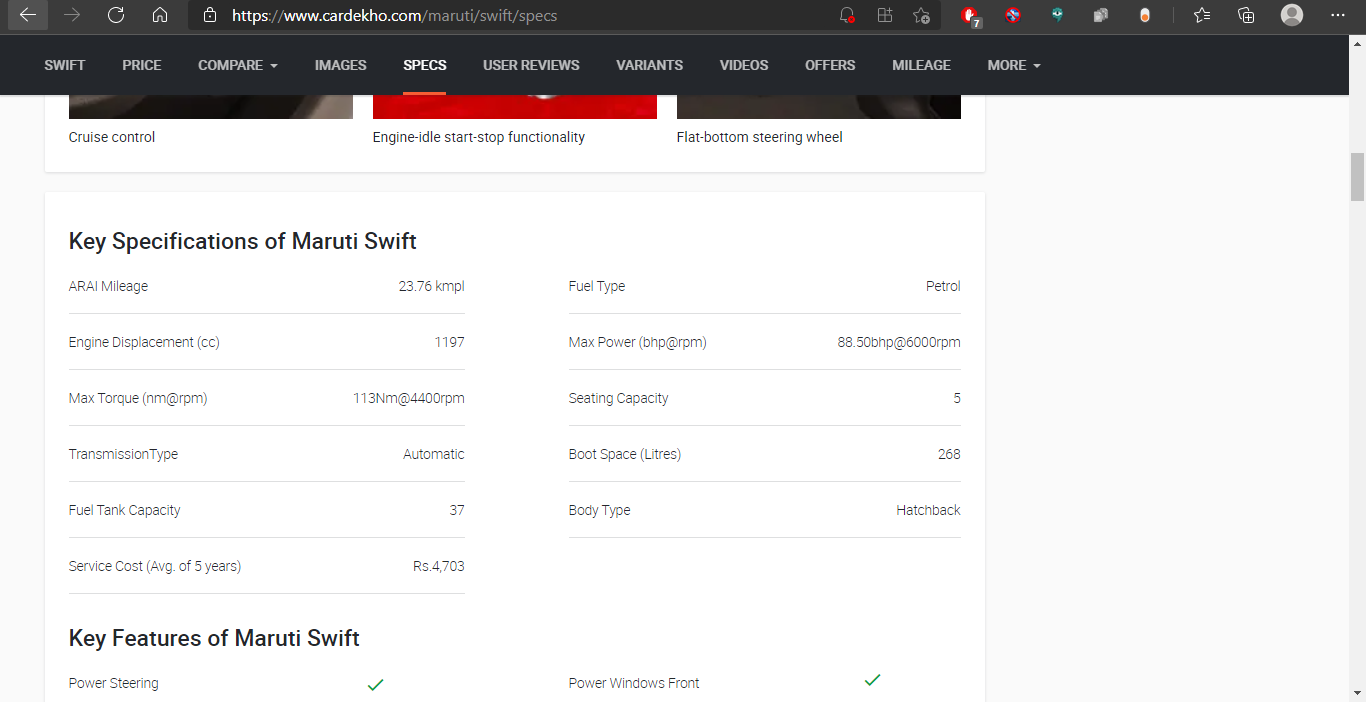

# RESEARCH GOAL
---
1. Mengetahui Apakah Brand Mobil Mempengaruhi Harga Mobil
2. Mengetahui Apakah Kapasitas Mesin, Kecepatan Maksimum dan Penggunaan Bahan Bakar menjadi faktor pada harga mobil
3. Mengetahui perbandingan antara jenis mobil dengan transmisi manual dan transmisi otomatis
4. Mengetahui tingkat kemahalan mobil berdasarkan jenis penjualnya
5. Memprediksi harga mobil bekas dengan menggunakan model Linear Regression dan Stochastic Gradient Descent

# IMPORT MODULES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme()

# RETRIEVING DATA

In [3]:
DF = pd.read_csv('./Car details v3.csv')
print(f'Dimensi : {DF.shape}')

Dimensi : (8128, 13)


# EDA

In [4]:
DF.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


Kami memutuskan untuk menghilangkan fitur 'torque' di data kami. Dikarenakan format datanya yang acak sehingga sulit untuk mengambil nilai dari fiturnya. Selain itu, 'torque' sendiri juga sudah memiliki nilai pada fitur 'max_power'
<br>
http://www.epi-eng.com/piston_engine_technology/power_and_torque.htm
<li> POWER (the rate of doing WORK) is dependent on TORQUE and RPM.
<li> TORQUE and RPM are the MEASURED quantities of engine output.
<li> POWER is CALCULATED from torque and RPM, by the following equation:
<li> HP = Torque x RPM ÷ 5252

In [5]:
DF.drop(['torque'], axis=1, inplace=True)

In [6]:
car_df = DF.copy()
car_df.shape

(8128, 12)

In [7]:
car_df.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [8]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(8)
memory usage: 762.1+ KB


## TAKE VALUES FROM  `mileage`, `engine`, AND `max_power` COLUMNS

###  FUNCTION

In [9]:
def split(str):
  try:
    try:
        return float(str.split()[0])
    except:
        return None
  except:
    return None

def convert_float(data):
  data = [split(x) for x in data.to_list()]
  return pd.Series(data)

In [10]:
car_df['engine'] = convert_float(car_df.engine)
car_df['mileage'] = convert_float(car_df.mileage)
car_df['max_power'] = convert_float(car_df.max_power)

In [11]:
car_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0


## REMOVE DUPLICATES

In [12]:
car_df[car_df.duplicated(keep = False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN
32,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.00,796.0,35.00,5.0
33,Hyundai i20 1.2 Asta Dual Tone,2018,730000,2388,Petrol,Individual,Manual,First Owner,18.60,1197.0,81.83,5.0
34,Maruti Vitara Brezza LDi,2017,650000,16200,Diesel,Individual,Manual,First Owner,24.30,1248.0,88.50,5.0
35,Maruti Alto 800 CNG LXI Optional,2019,330000,10000,CNG,Individual,Manual,Second Owner,33.44,796.0,40.30,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37,1461.0,108.45,5.0
7988,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09,1248.0,88.50,5.0
8117,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59,1248.0,74.00,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70.00,5.0


In [13]:
car_df.drop_duplicates(inplace = True)

In [14]:
car_df[car_df.duplicated(keep = False)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats


In [15]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6926 non-null   object 
 1   year           6926 non-null   int64  
 2   selling_price  6926 non-null   int64  
 3   km_driven      6926 non-null   int64  
 4   fuel           6926 non-null   object 
 5   seller_type    6926 non-null   object 
 6   transmission   6926 non-null   object 
 7   owner          6926 non-null   object 
 8   mileage        6718 non-null   float64
 9   engine         6718 non-null   float64
 10  max_power      6720 non-null   float64
 11  seats          6718 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 703.4+ KB


In [16]:
car_df.head(20)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.30,1061.0,57.50,5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.10,796.0,37.00,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59,1364.0,67.10,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.00,1399.0,68.10,5.0


## REMOVE OUTLIERS

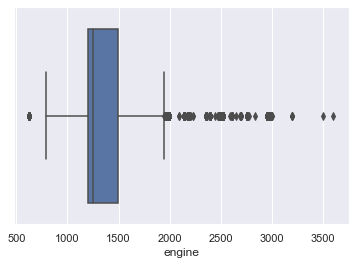

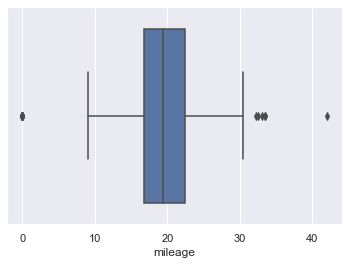

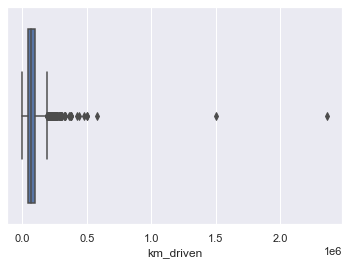

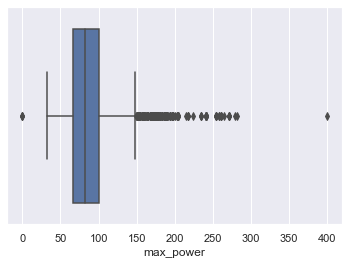

In [17]:
sns.boxplot(x = car_df.engine)
plt.show()
sns.boxplot(x = car_df.mileage)
plt.show()
sns.boxplot(x = car_df.km_driven)
plt.show()
sns.boxplot(x = car_df.max_power)
plt.show()

<img src='https://miro.medium.com/max/18000/1*2c21SkzJMf3frPXPAR_gZA.png' > </img>

Untuk mendeteksi outliers, kami menggunakan boxplot. Kemudian, kami menggunakan strategi yaitu menghilangkan nilai yang 1.5xIQR lebih tinggi daripada Q3 dan menghilangkan nilai yang 1.5xIQR lebih rendah daripada Q1

In [18]:
def iqr_removal(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    filter = (df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)
    return df.loc[filter]

### `mileage`

In [19]:
car_df = iqr_removal(car_df, 'mileage')
car_df.shape

(6697, 12)

### `engine`

In [20]:
car_df = iqr_removal(car_df, 'engine')
car_df.shape

(5496, 12)

### `max_power`

In [21]:
car_df = iqr_removal(car_df, 'max_power')
car_df.shape

(5220, 12)

### `km_driven`

In [22]:
car_df = iqr_removal(car_df, 'km_driven')
car_df.shape

(5100, 12)

### DROP MISSING VALUE

Setelah itu, mari cek apakah ada <i> missing value </i> pada data

In [23]:
car_df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

Oke, gak ada

## FEATURE ENGINEERING

### TAMBAH FEATURE `MERK`

Rasanya sayang banget kalo tiba-tiba fitur name langsung di drop. Jadi kami mencoba mencari suatu informasi menarik dari fitur name yang dapat kami gunakan. Ternyata, tiap-tiap kata pertama dari fitur name merupakan nama merk dari mobil tersebut. Pastinya dari data tersebut cukup banyak yang dapat dianalisis. Oleh karena itu kami mengganti fitur name menjadi fitur merk. 

In [24]:
car_df['merk'] = [x.split()[0] for x in car_df.name.to_list()]
car_df.drop('name', axis = 1, inplace = True)
car_df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,merk
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti


### TAMBAH FEATURE `AGE`

Kami memutuskan untuk merubah fitur year menjadi fitur age. Hal ini dilakukan agar angka yang ada pada data menjadi lebih kecil walaupun informasi yang diberikan sama.

In [25]:
car_df['age'] = 2021 - car_df.year
car_df.drop('year', axis = 1, inplace = True)
car_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,merk,age
0,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,Maruti,7
1,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,Skoda,7
2,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,Honda,15
3,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,Hyundai,11
4,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,Maruti,14


## VISUALISASI DATA

Kami mencoba untuk melihat korelasi antar data menggunakan heatmap.

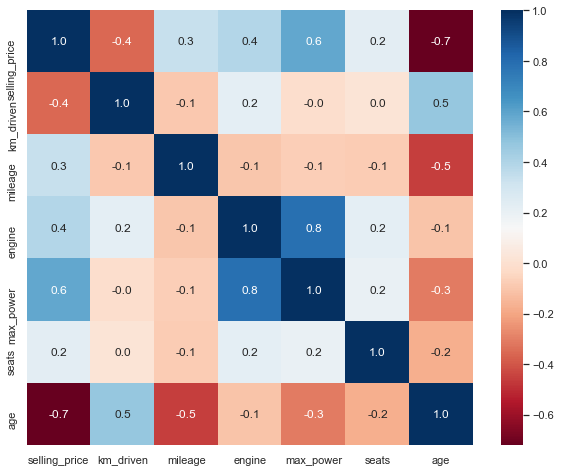

In [26]:
plt.figure(figsize = [10, 8])
sns.heatmap(car_df.corr(), cmap='RdBu', annot = True, fmt = '.1f')
plt.show()

Dari heatmap diatas, ada beberapa informasi yang bisa kita dapatkan.
1. `engine` memiliki korelasi dengan `max_power`
2. `age` dari mobil memiliki korelasi dengan `km_driven`
3. `max_power` memiliki korelasi dengan `selling_price`
4. `age` memiliki korelasi kebalikan dengan `selling_price` 
4. `age` memiliki korelasi kebalikan dengan `mileage` 

Mari kita analisis data lebih lanjut.
Sekarang kami akan mencoba mengetahui apakah merk mobil memiliki pengaruh terhadap harga mobil. Caranya dengan membandingkan plot bar antara harga mobil pada tiap-tiap merk dengan kekuatan maksimum mobil pada tiap-tiap merk

Text(0, 0.5, 'max_power')

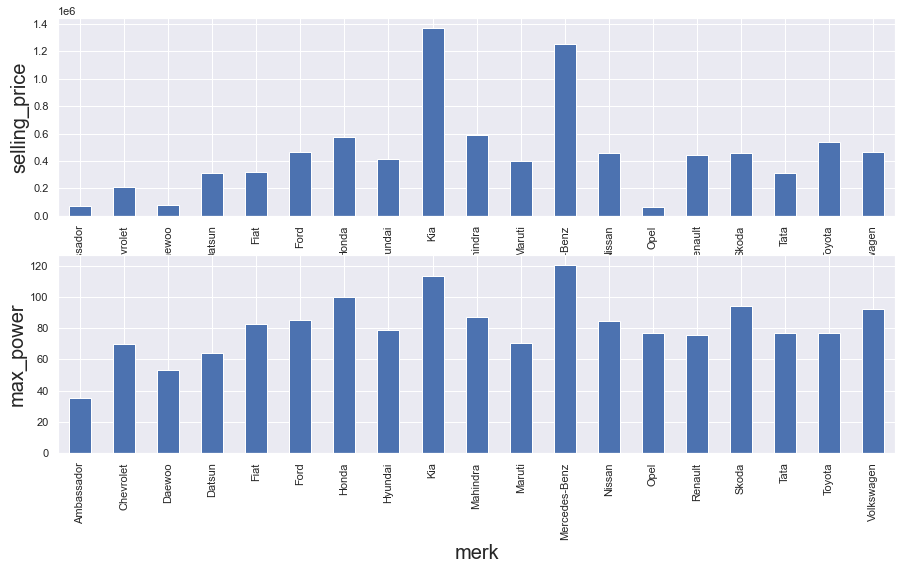

In [27]:
plt.title('Hubungan Merk Mobil dengan Harga', size = 20)
plt.subplot(2, 1, 1)
car_df.groupby(['merk'])['selling_price'].mean().plot(kind='bar', figsize = [15, 8])
plt.xlabel('merk', size = 20)
plt.ylabel('selling_price', size = 20)
plt.subplot(2, 1, 2)
car_df.groupby(['merk'])['max_power'].mean().plot(kind='bar', figsize = [15, 8])
plt.xlabel('merk', size = 20)
plt.ylabel('max_power', size = 20)


Terlihat bahwa merk memang cukup mempengaruhi pada harga mobil. Misalnya pada merk Maruti yang memiliki rata-rata "kekuatan maksimum" lebih rendah daripada merk Opel namun harga rata-ratanya lebih tinggi daripada merk Opel. <br>

<br>
<br>
Selanjutnya mari kita lihat pada fitur umur. Kita lihat hubungan fitur umur dengan fitur lainnya.


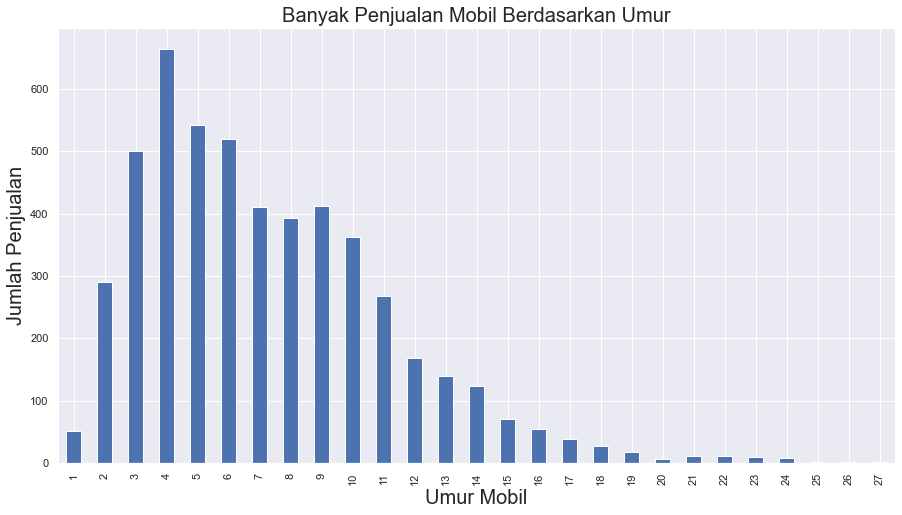

In [28]:
plt.figure(figsize = [15,8])
plt.title('Banyak Penjualan Mobil Berdasarkan Umur', size = 20)
car_df.groupby('age').count().merk.plot.bar()
plt.ylabel('Jumlah Penjualan', size = 20)
plt.xlabel('Umur Mobil', size = 20)
plt.show()

Terlihat bahwa orang-orang cenderung menjual mobil ketika usia mobil tersebut berada pada kisaran 3 sampai 10 tahun 
<br>
<br>
<br>
Bagaimana dengan harga mobilnya?

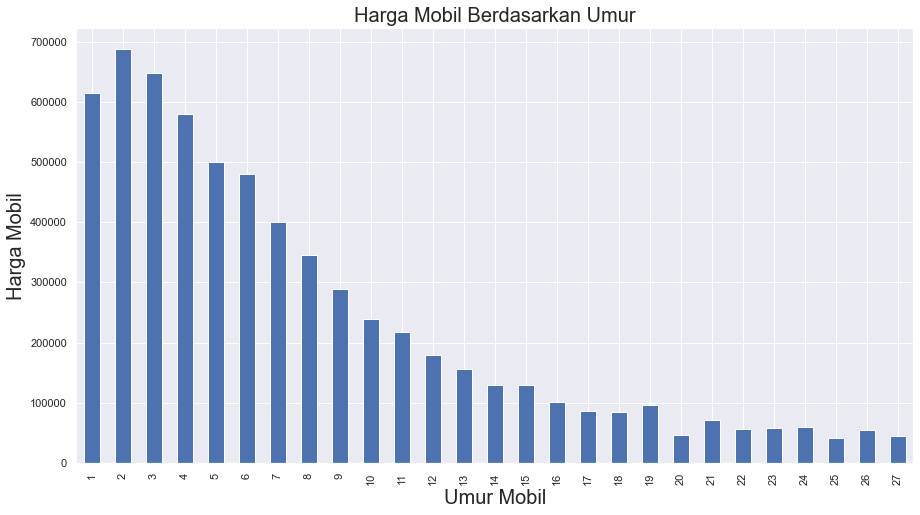

In [29]:
plt.figure(figsize = [15,8])
plt.title('Harga Mobil Berdasarkan Umur', size = 20)
car_df.groupby(['age'])['selling_price'].mean().plot.bar()
plt.ylabel('Harga Mobil', size = 20)
plt.xlabel('Umur Mobil', size = 20)
plt.show()

Sekarang mari kita ke fitur bahan bakar

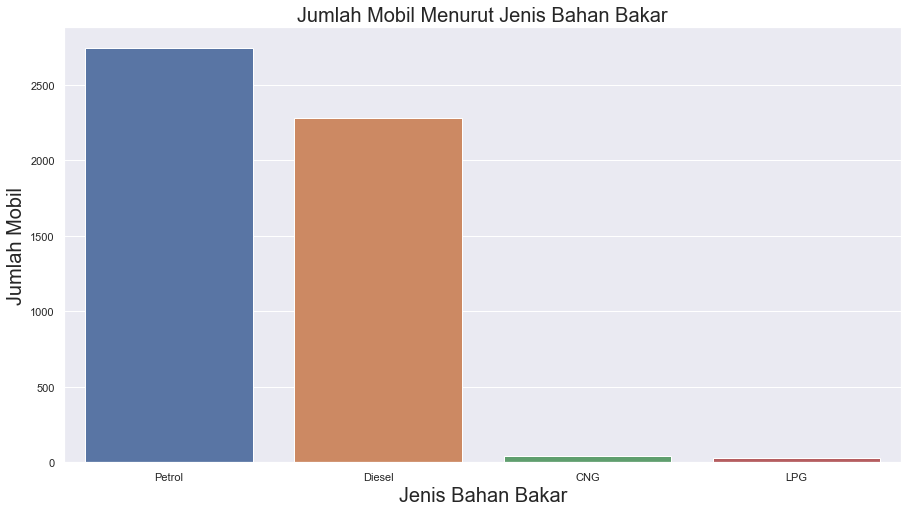

Petrol    2744
Diesel    2280
CNG         45
LPG         31
Name: fuel, dtype: int64


In [30]:
plt.figure(figsize = [15, 8])
sns.barplot(x = car_df['fuel'].value_counts().index, y = car_df['fuel'].value_counts())
plt.title('Jumlah Mobil Menurut Jenis Bahan Bakar', size = 20)
plt.ylabel('Jumlah Mobil', size = 20)
plt.xlabel('Jenis Bahan Bakar', size = 20)
plt.show()
print(car_df.fuel.value_counts())

Tampaknya mobil-mobil sekarang pada umumnya menggunakan bahan bakar Diesel atau Petrol. Sedikit sekali mobil yang menggunakan bahan bakar CNG ataupun LPG
<br>
<br>
Mari kita lihat pada harga mobil berdasarkan jenis bahan bakarnya.

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


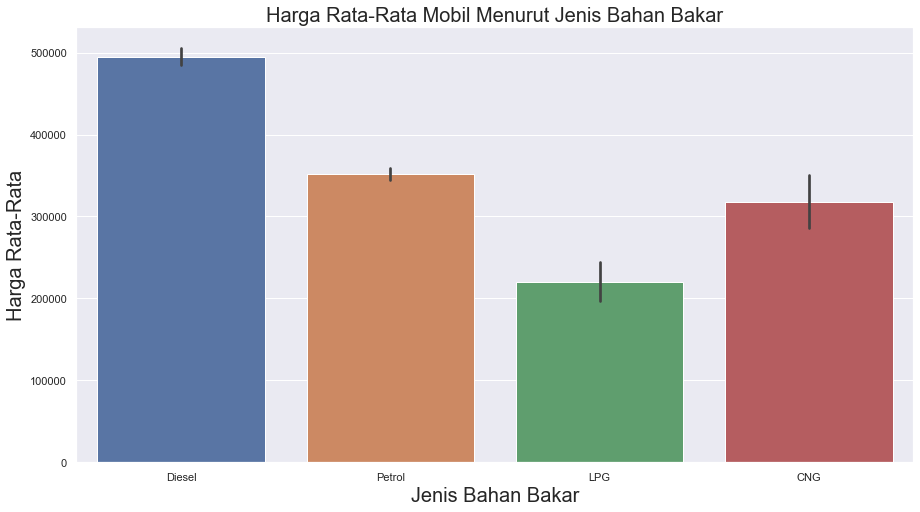

fuel
CNG       318244.377778
Diesel    495069.225877
LPG       219709.677419
Petrol    352463.911808
Name: selling_price, dtype: float64


In [31]:
plt.figure(figsize = [15, 8])
sns.barplot(car_df.fuel, car_df.selling_price)
plt.title('Harga Rata-Rata Mobil Menurut Jenis Bahan Bakar', size = 20)
plt.ylabel('Harga Rata-Rata', size = 20)
plt.xlabel('Jenis Bahan Bakar', size = 20)
plt.show()
print(car_df.groupby(['fuel'])['selling_price'].mean())

Ternyata harga mobil dengan bahan bakar Diesel atau Petrol lebih tinggi daripada harga mobil dengan bahan bakar LPG atau CNG
<br>
<br>
Sekarang mari kita melihat fitur seller_type

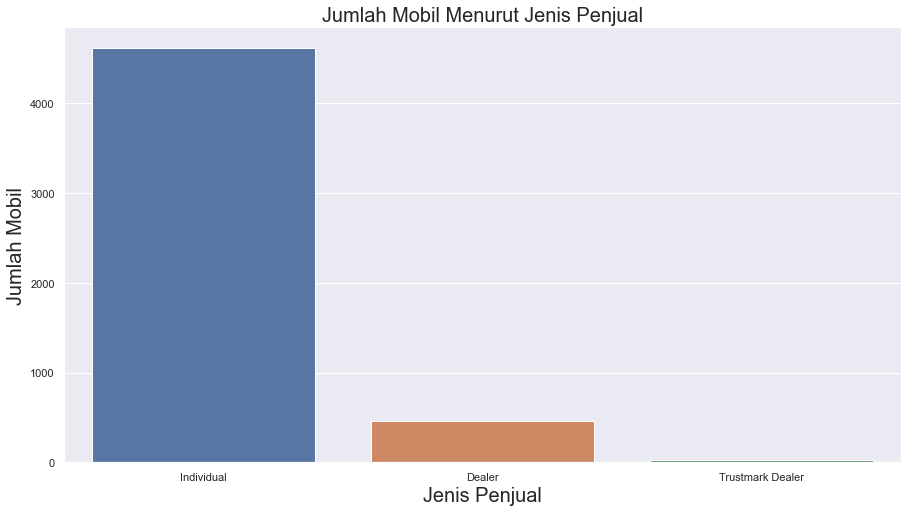

Individual          4614
Dealer               462
Trustmark Dealer      24
Name: seller_type, dtype: int64


In [32]:
plt.figure(figsize = [15, 8])
sns.barplot(x = car_df['seller_type'].value_counts().index, y = car_df['seller_type'].value_counts())
plt.title('Jumlah Mobil Menurut Jenis Penjual', size = 20)
plt.ylabel('Jumlah Mobil', size = 20)
plt.xlabel('Jenis Penjual', size = 20)
plt.show()
print(car_df.seller_type.value_counts())

Ternyata orang-orang lebih banyak yang menjual secara individu daripada dengan metode lainnya 
<br>
<br>
Bagaimana dengan harganya?

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


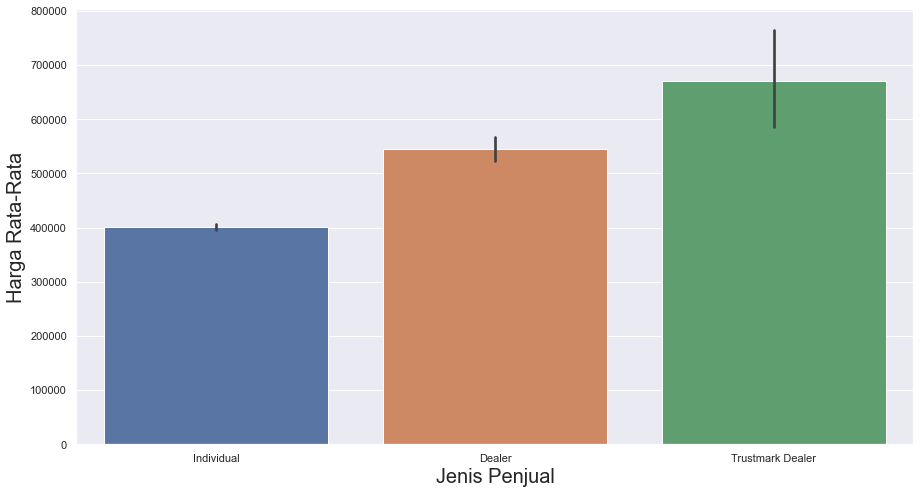

In [33]:
plt.figure(figsize = [15, 8])
sns.barplot(car_df.seller_type, car_df.selling_price)
plt.ylabel('Harga Rata-Rata', size = 20)
plt.xlabel('Jenis Penjual', size = 20)
plt.show()

Justru ternyata harga mobil cenderung lebih murah apabila orang yang menjual merupakan orang individu. Sedangkan apabila dengan dealer, harga mobil justru lebih mahal
<br>
<br>
Sekarang mari kita lihat fitur transmisi

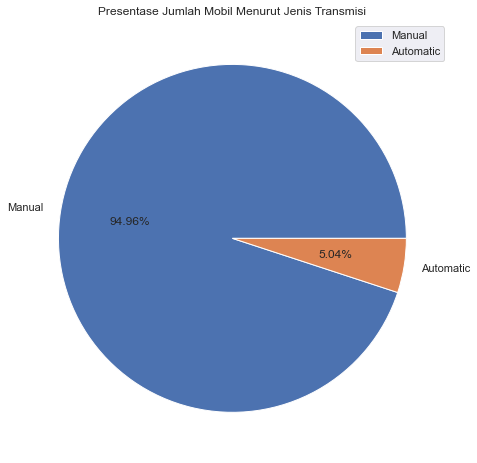

In [34]:
car_df.transmission.value_counts().plot(kind = 'pie', legend = True, autopct = '%.2f%%', figsize = [10, 8])
plt.title('Presentase Jumlah Mobil Menurut Jenis Transmisi')
plt.ylabel('')
plt.show()

Ternyata mobil yang dijual mayoritas merupakan transmisi manual. Transmisi otomatis masih belum cukup populer
<br>
<br>
Bagaimana dengan harganya?

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


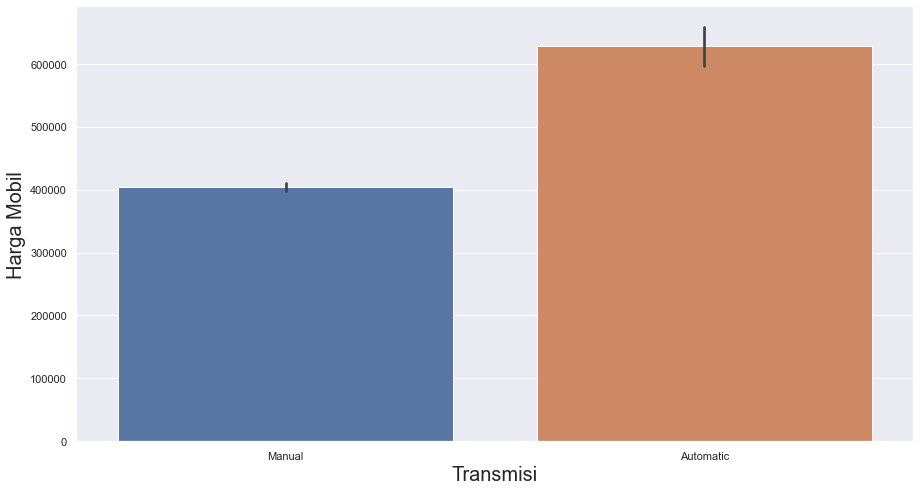

Mobil dengan jenis transmisi otomatis cenderung lebih mahal dibandingkan dengan mobil yang transmisinya manual.
transmission
Automatic    627571.961089
Manual       403833.328928
Name: selling_price, dtype: float64


In [35]:
plt.figure(figsize = [15, 8])
sns.barplot(car_df.transmission, car_df.selling_price)
plt.xlabel('Transmisi', size = 20)
plt.ylabel('Harga Mobil', size = 20)
plt.show()
print('Mobil dengan jenis transmisi otomatis cenderung lebih mahal dibandingkan dengan mobil yang transmisinya manual.')
print(car_df.groupby(['transmission'])['selling_price'].mean())

Seperti yang terlihat bahwa mobil dengan transmisi automatic memiliki harga lebih tinggi daripada mobil dengan transmisi manual
<br>
<br>
Sekarang mari kita lihat hubungan antara Jarak Tempuh Mobil dengan Harga Mobil

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


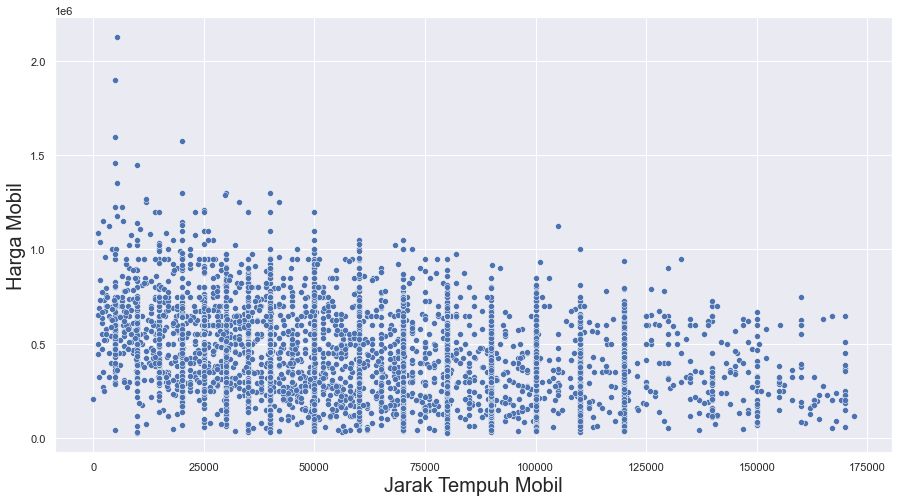

In [36]:
plt.figure(figsize = [15, 8])
sns.scatterplot(car_df.km_driven, car_df.selling_price)
plt.ylabel('Harga Mobil', size = 20)
plt.xlabel('Jarak Tempuh Mobil', size = 20)
plt.show()

Ternyata jarak tempuh mobil tidak terlalu berpengaruh terhadap harga. Walaupun ada mobil yang memang jarak tempuhnya 0 (mobil baru) tetapi harganya sangat tinggi. Tetapi mayoritas dari mobil tidak melihat jarak tempuh untuk menentukan harga mobil
<br>
<br>
<br>
Sekarang mari kita lihat hubungan antara penggunaan bahan bakar dengan Harga Mobil

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


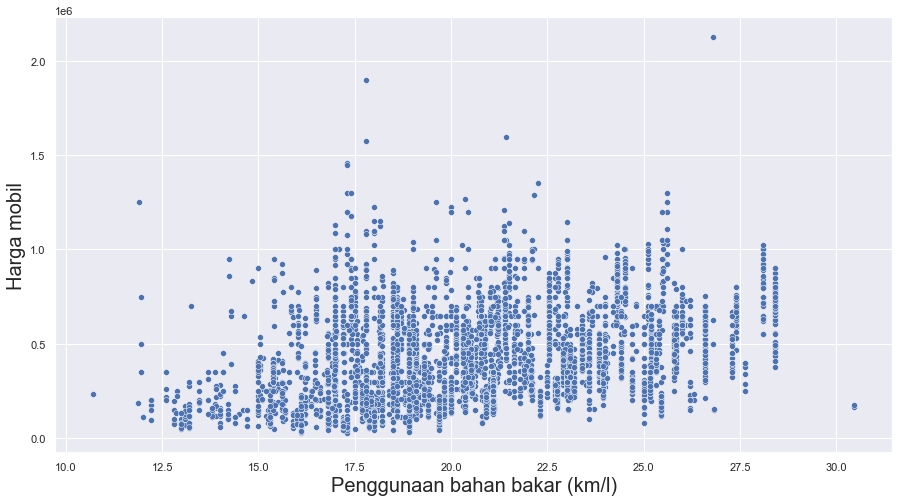

In [37]:
plt.figure(figsize = [15, 8])
sns.scatterplot(car_df.mileage, car_df.selling_price)
plt.xlabel('Penggunaan bahan bakar (km/l)', size = 20)
plt.ylabel('Harga mobil', size = 20)
plt.show()

Tampaknya dari scatter plot, terlihat bahwa penggunaan bahan bakar mobil yang makin hemat akan menaikkan harga mobil. Walaupun tidak begitu signifikan
<br>
<br>
<br>
Sekarang mari kita lihat hubungan antara kapasitas mesin dengan Harga Mobil

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


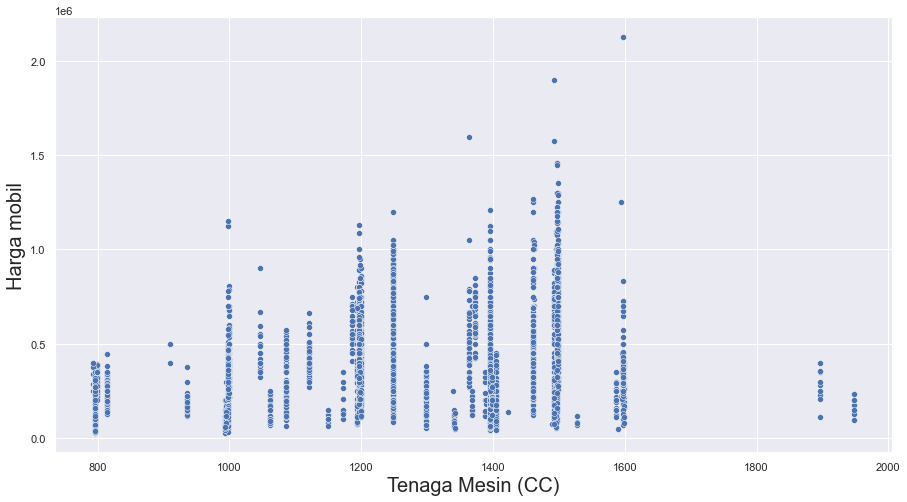

In [38]:
plt.figure(figsize = [15, 8])
sns.scatterplot(car_df.engine, car_df.selling_price)
plt.xlabel('Tenaga Mesin (CC)', size = 20)
plt.ylabel('Harga mobil', size = 20)
plt.show()

Tampaknya tidak ada hubungan sama sekali. Data pada scatter plot terlihat cukup menyebar
<br>
<br>
<br>
Sekarang mari kita lihat hubungan antara kecepatan maksimal dengan Harga Mobil

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


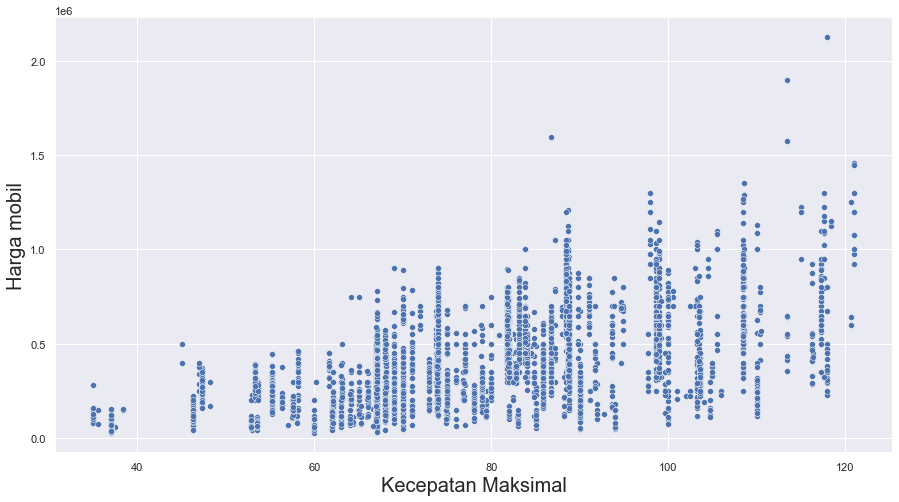

In [39]:
plt.figure(figsize = [15, 8])
sns.scatterplot(car_df.max_power, car_df.selling_price)
plt.xlabel('Kecepatan Maksimal', size = 20)
plt.ylabel('Harga mobil', size = 20)
plt.show()

Terlihat ada korelasi walaupun korelasi tersebut tidak mencakup ke seluruh data.
<br>
<br>
<br>
Sekarang mari kita pairplot pada tiap-tiap fiturnya

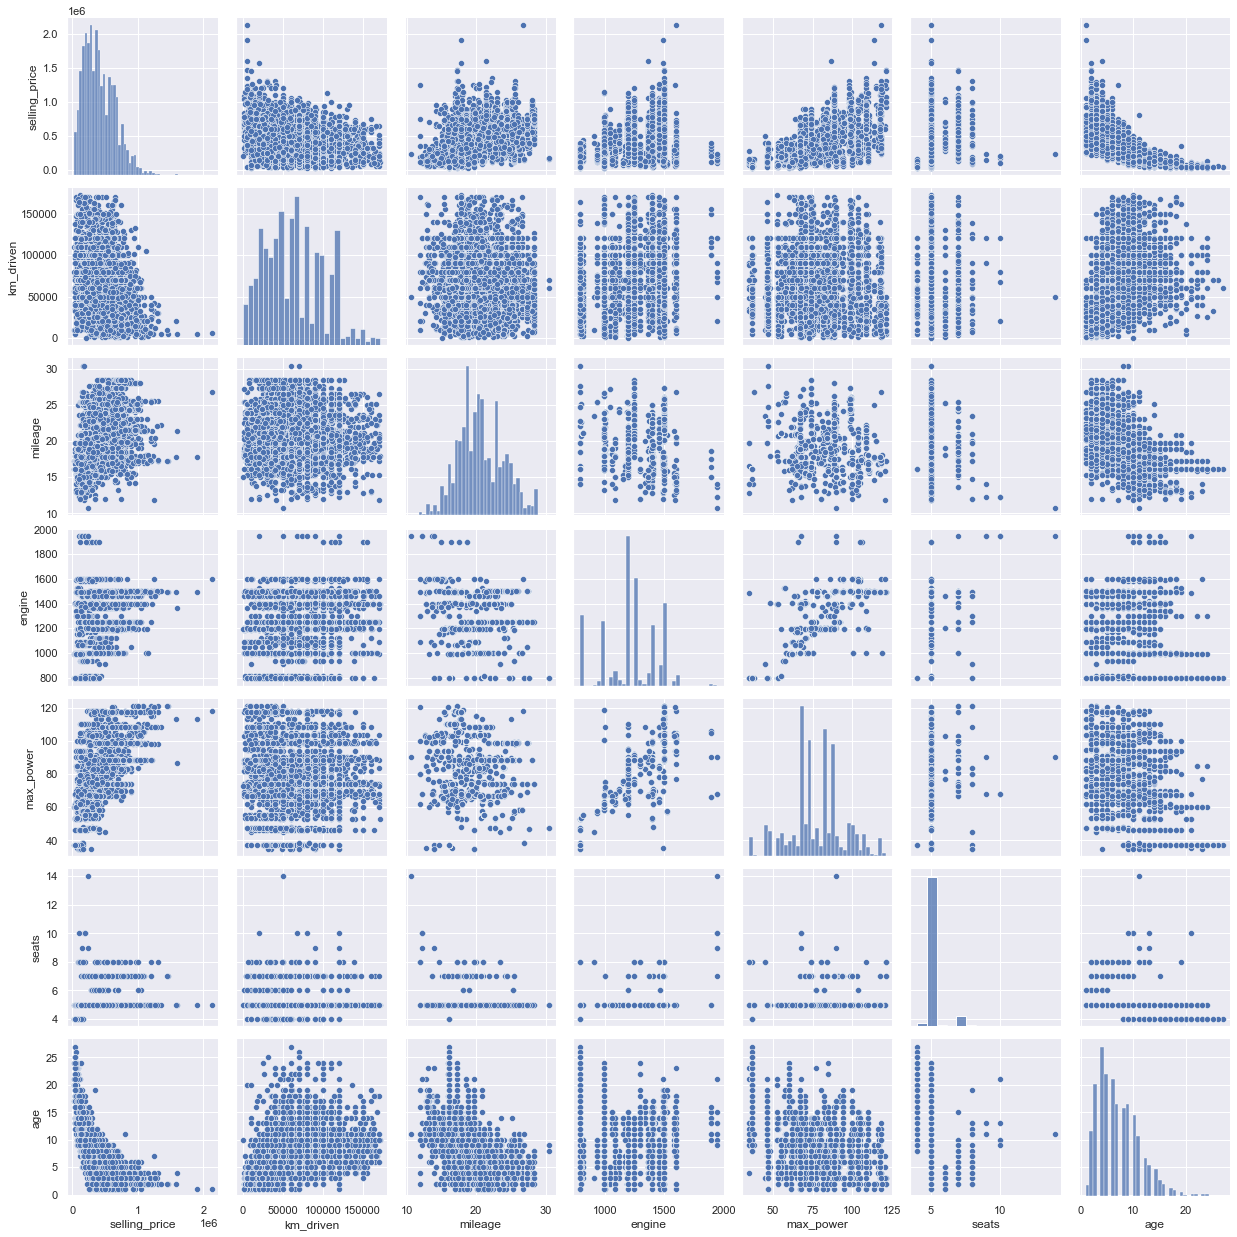

In [40]:
sns.pairplot(car_df)

In [41]:
car_df.drop(['seats'], inplace=True, axis=1)

Kurang lebih kesimpulannya sama dengan heatmap. Dari pairplot diatas akan terlihat korelasi-korelasi yang ada pada tiap-tiap fiturnya

## Mengubah Categorical Menjadi Indicator

Untuk fitur categorical, perlu dilakukan get_dummies agar fitur tersebut berubah menjadi fitur indicator yang berisikan nilai 0 atau 1

In [42]:
car_df = pd.get_dummies(car_df, drop_first = True)
car_df.head()

,selling_price,km_driven,mileage,engine,max_power,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,...,merk_Mahindra,merk_Maruti,merk_Mercedes-Benz,merk_Nissan,merk_Opel,merk_Renault,merk_Skoda,merk_Tata,merk_Toyota,merk_Volkswagen
0,450000,145500,23.40,1248.0,74.00,7,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
1,370000,120000,21.14,1498.0,103.52,7,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,158000,140000,17.70,1497.0,78.00,15,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,225000,127000,23.00,1396.0,90.00,11,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,130000,120000,16.10,1298.0,88.20,14,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0


## Memisahkan Antara Fitur Dengan Label

In [43]:
price_df = car_df.selling_price.copy()
car_df.drop('selling_price', axis = 1, inplace = True)
print(f'price_df : {price_df.shape} | car_df : {car_df.shape}')

price_df : (5100,) | car_df : (5100, 33)


In [44]:
car_df.head()

,km_driven,mileage,engine,max_power,age,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,merk_Mahindra,merk_Maruti,merk_Mercedes-Benz,merk_Nissan,merk_Opel,merk_Renault,merk_Skoda,merk_Tata,merk_Toyota,merk_Volkswagen
0,145500,23.40,1248.0,74.00,7,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,120000,21.14,1498.0,103.52,7,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,140000,17.70,1497.0,78.00,15,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
3,127000,23.00,1396.0,90.00,11,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,120000,16.10,1298.0,88.20,14,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0


In [45]:
price_df

0       450000
1       370000
2       158000
3       225000
4       130000
         ...  
8121    260000
8122    475000
8123    320000
8124    135000
8125    382000
Name: selling_price, Length: 5100, dtype: int64

# MODELLING

## Linear Regression
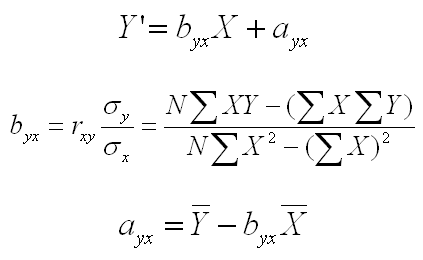

Untuk kode yang pertama kami menggunakan linear regression. Untuk rumusnya yaitu tertera pada gambar diatas
<br>
<br>
<br>
Kenapa rumus diatas dapat dijadikan solusi bagi masalah linear regression? Apabila memang pada suatu variabel Xi memiliki pengaruh terhadap variabel y melalui perhitungan korelasi keduanya, maka pada variabel tersebut akan memiliki suatu nilai yang dapat dikalikan terhadap standar deviasi y / standar deviasi x. Sebaliknya apabila variabel Xi tidak memiliki pengaruh terhadap variabel y (korelasi bernilai 0), maka variabel tersebut tidak akan menambah nilai y sama sekali.
<br>
<br>
<br>
Sebelum menggunakan linear regression, sebaiknya kita ubah terlebih dahulu data dengan standardscaler

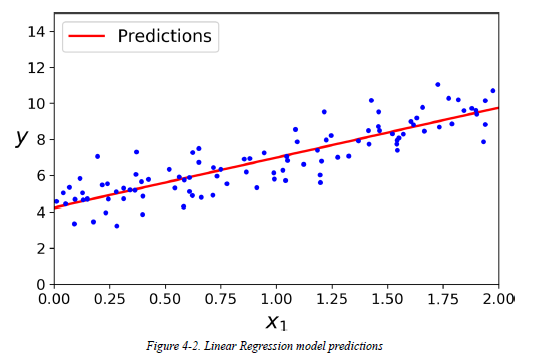

In [46]:
class standard_scaler():  
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        return (X - self.mean) / self.std

In [47]:
car_df = car_df.to_numpy()

Kemudian kita pisah data dengan data_split() agar terbentuk data training dan data test

In [48]:
def data_split(X, y, test_size=0.2):
    n = len(y)
    index = list(range(n))
    np.random.shuffle(index)
    train = int(n*test_size)
    test = n - train
    return  X[index[:test]], X[index[test:n]], y[index[:test]], y[index[test:n]]

In [49]:
X_train, X_test, y_train, y_test = data_split(car_df, price_df.to_numpy())

In [50]:
scaler = standard_scaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
class LinearRegressionWithCorrelation():
    def fit(self, X, y):
        n, shape1 = X.shape
        self.m = np.ones([shape1])
        sigma_y = y.sum()
        for i in range(shape1):
            if(X[:, i].all() == 1):
                X[0, i] = 0
            sigma_xy = (X[:, i] * y).sum()
            sigma_x = X[:, i].sum()
            sigma_x2 = (X[:, i] ** 2).sum()
            sigma_x_2 = sigma_x ** 2
            calc = ((n * sigma_xy) - (sigma_x * sigma_y)) / ((n * sigma_x2) - sigma_x_2)
            self.m[i] = calc
        
        self.coef_ = self.m
        self.intercept_ = (sigma_y - (self.m * X).sum()) / n
        
        return self.m
    
    def predict(self, X):
        hasil = np.ones([X.shape[0]])
        for i in range(X.shape[0]):
            hasil[i] = (self.m * X[i]).sum() + self.intercept_
        return hasil

Coba kita training menggunakan model yang telah kita buat

In [52]:
mltr = LinearRegressionWithCorrelation()
mltr.fit(X_train, y_train)

array([ -82837.20557251,   79495.01015283,   93268.02144826,
        140144.79139777, -168639.09248301,   72065.22494176,
        -14328.4364977 ,  -68106.59913523,  -45179.75760819,
         17139.24552101,  -48419.34246022,  -34546.19929038,
        -59520.57585318,   14657.5695157 ,  -52216.97466048,
        -36963.44925754,   -9137.87871216,   -9363.96628193,
         -8946.99776955,   12871.52675254,   43033.11068185,
          -850.1661678 ,   26008.74695308,   31459.13892498,
        -12828.13858687,   13091.81680067,    1981.43673736,
         -5415.38029094,    5636.25788953,    4484.9073524 ,
        -32206.82047812,   12263.90494742,    8643.85162765])

Berikut adalah bobot-bobot tiap fiturnya. Sekarang coba kita evaluasi. Untuk pengevaluasian kami menggunakan RMSE(Root Mean Squared Error).

In [53]:
def rmse(y, y_hat):
    return np.sqrt(((y - y_hat) ** 2).mean())

Sebagai perbandingan, maka kita juga melihat dengan menggunakan model pada library Sklearn

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
log_reg = LinearRegression()
log_reg.fit(X_train, y_train)

LinearRegression()

In [56]:
rmse(log_reg.predict(X_test), y_test)

113223.87637160167

In [57]:
y_hat = mltr.predict(X_test)
rmse(y_test, y_hat)

330953.65893682756

Text(0, 0.5, 'selling_price')

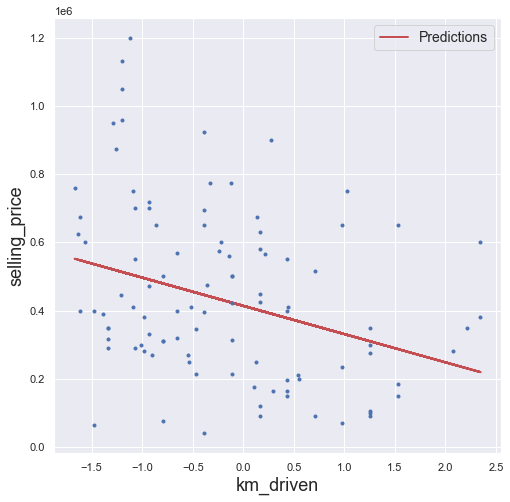

In [58]:
plt.figure(figsize=[8, 8])
plt.plot(X_test[:100, 0], np.array([mltr.coef_[0] * test + mltr.intercept_ for test in X_test[:100, 0]]), 'r-', linewidth=2, label="Predictions")
plt.plot(X_test[:100, 0], y_test[:100], 'b.')
plt.legend(fontsize=14)
plt.xlabel("km_driven", fontsize=18)
plt.ylabel('selling_price', fontsize=18)

Error yang sangat tinggi. Coba kita ubah fitur menjadi fitur polynomial

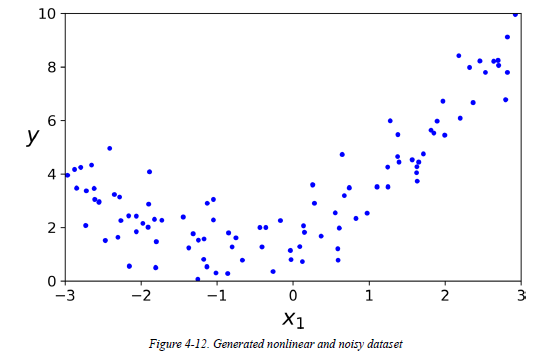

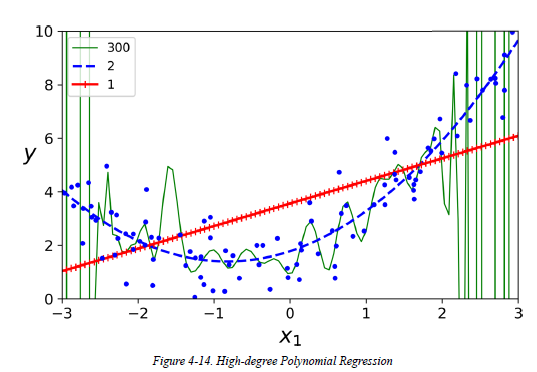

In [59]:
from itertools import combinations_with_replacement
import math

class make_polynomial():
    
    def __init__(self, dims):
        self.dims = dims
        
    def transform(self, X):
        index0, index1 = X.shape
        numpy = np.zeros([index0, index1 * 2 + math.comb(index1, self.dims) + 1])
        numpy[:, 0] = np.ones([index0])
        numpy[:, 1:index1+1] = X
        i = index1 + 1
        for x in combinations_with_replacement(range(index1), self.dims):
            y = np.ones([index0])
            for z in x:
                y *= X[:, z]
            numpy[:, i] = y
            i+=1
        return numpy
        

In [60]:
X_train_pol = make_polynomial(2).transform(X_train)
X_test_pol = make_polynomial(2).transform(X_test)

In [61]:
mltr2 = LinearRegressionWithCorrelation()
mltr2.fit(X_train_pol, y_train)

array([ 1.13864347e+05, -8.28372056e+04,  7.94950102e+04,  9.32680214e+04,
        1.40144791e+05, -1.68639092e+05,  7.20652249e+04, -1.43284365e+04,
       -6.81065991e+04, -4.51797576e+04,  1.71392455e+04, -4.84193425e+04,
       -3.45461993e+04, -5.95205759e+04,  1.46575695e+04, -5.22169747e+04,
       -3.69634493e+04, -9.13787871e+03, -9.36396628e+03, -8.94699777e+03,
        1.28715268e+04,  4.30331107e+04, -8.50166168e+02,  2.60087470e+04,
        3.14591389e+04, -1.28281386e+04,  1.30918168e+04,  1.98143674e+03,
       -5.41538029e+03,  5.63625789e+03,  4.48490735e+03, -3.22068205e+04,
        1.22639049e+04,  8.64385163e+03,  5.68611098e+02,  3.59437623e+04,
       -3.91255472e+04, -4.01918860e+04,  2.45712999e+03, -4.03052305e+03,
       -3.77302021e+02,  3.66769232e+03,  1.52395244e+04, -1.24156203e+04,
        2.88661762e+04, -9.13026185e+03,  1.03050925e+04, -8.63885513e+03,
       -1.37608782e+04,  1.18829878e+04, -1.92083318e+03,  1.23509937e+04,
        2.54224015e+03, -

In [62]:
y_hat = mltr2.predict(X_test_pol)
rmse(y_hat, y_test)

1446970.4026444368

Ternyata dengan menambah fitur polynomial malah memperburuk.
<br>
<br>
<br>
Sekarang kami akan menggunakan metode Linear Regression yang lain. Konsepnya mudah. Yaitu hanya dengan memindahkan x menjadi invers sehingga kita dapat mencari nilai Y

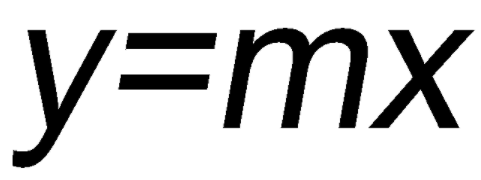

In [63]:
class LinearRegressionWithInverse():
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        self.coef_ = np.dot(y, np.linalg.pinv(X).T)
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coef_[i]
        return result
    
    def coef_():
        return self.coef_

Oke jadi kita coba training, pertama coba dahulu tanpa fitur polynomial

In [64]:
mlr = LinearRegressionWithInverse()
mlr.fit(X_train, y_train)

In [65]:
y_hat = mlr.predict(X_test)
rmse(y_hat, y_test)

424970.6542359738

Tidak sebagus metode pertama. Sekarang kita coba dengan fitur polynomial

In [66]:
mlr2 = LinearRegressionWithInverse()
mlr2.fit(X_train_pol, y_train)

In [67]:
y_hat = mlr2.predict(X_test_pol)
rmse(y_hat, y_test)

82714.64808836012

In [68]:
X_test.shape

(1020, 33)

In [69]:
log_reg_pol = LinearRegression()
log_reg_pol.fit(X_train_pol, y_train)

LinearRegression()

In [70]:
rmse(log_reg_pol.predict(X_test_pol), y_test)

82607.42823575165

Hasilnya sangat membaik. 

## STOCHASTIC GRADIENT DESCENT

Selanjutnya kami akan mencoba menggunakan stochastic gradient descent (SGD). SGD ini merupakan versi pengacakan (stochastic) dari gradient descent. Gradient Descent itu sendiri merupakan metode dimana model akan mencari error yang seminimal mungkin dengan turunan dari rumus error yang digunakan. Rumus error yang kami gunakan pada model kami adalah rumus Least Square Error.

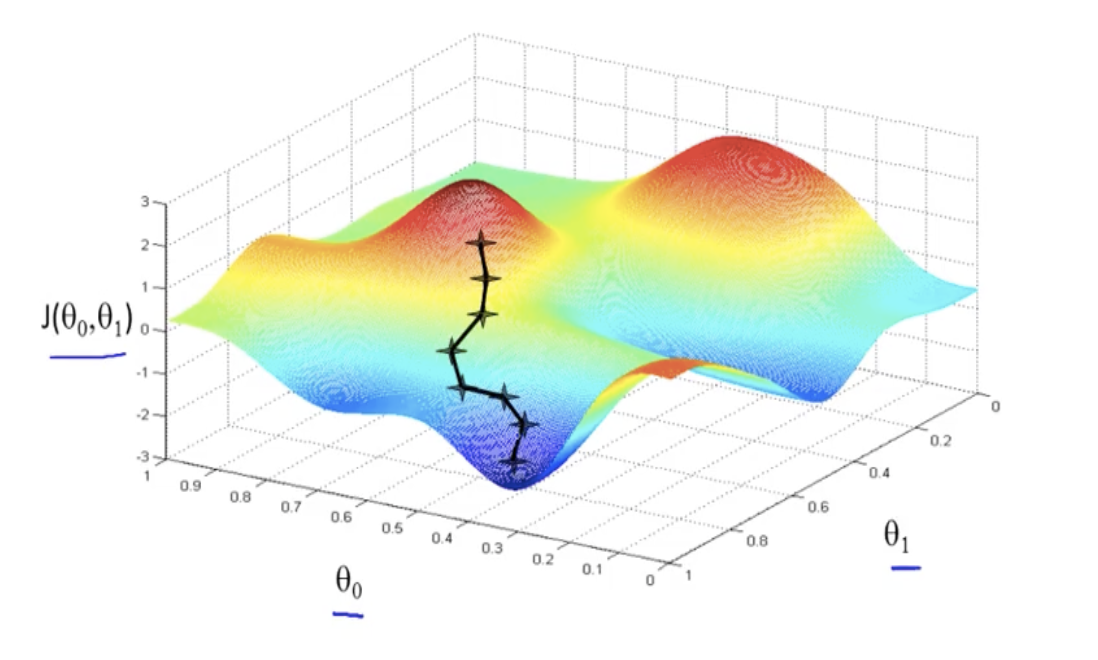

In [71]:
def sgd_plotting(data):
    plt.figure(figsize = [15, 8])
    plt.plot(data)
    plt.axhline(np.min(data), color = 'r', label = 'Minimum Error')
    plt.ylabel("Error")
    plt.legend()
    print('Error minimum: ', np.min(data))


In [72]:
class stochastic_gradient_descent():
    def __init__(self):
        self.data_value = []
        
    def shuffle_data(self, X, y, test_size=0.1):
        n = len(y)
        index = list(range(n))
        np.random.shuffle(index)
        train = int(n*test_size)
        return X[index[:train]], y[index[:train]]

    def fit(self, X, y, alpha=0.0001, max_iter=50, tol=1e-3):
        eta = np.random.rand(X.shape[1])
        alpha0 = alpha
        self.coef_ = np.zeros(X.shape[1])
        min_value = float('inf')
        no_improv = 0
        
        while no_improv < max_iter and min_value > tol:
            X_new, y_new = self.shuffle_data(X, y)
            value = ((y_new - (np.dot(X_new, eta))) ** 2).sum()
            if value < min_value:
                self.data_value.append(value)
                self.coef_ = eta
                min_value = value
                no_improv = 0
            else:
                no_improv += 1
                alpha0 *= 0.9
                
            error = y_new - (np.dot(X_new, eta))
            eta -= alpha0 * (-2 * ((np.dot(X_new.T, error))))
        
        sgd_plotting(self.data_value)
        return self.coef_
        
    def predict(self, X):
        X = np.array(X)
        result = np.zeros(len(X))
        for i in range(X.shape[1]):
            result += X[:, i] * self.coef_[i]
        return result

Error minimum:  70974916919914.94


array([-35255.17713835,  21735.74502531,  27875.24379557,  56337.35627433,
       -75309.96347433,  18200.46248101,  -1604.87598922, -15752.1067947 ,
        -7370.29660756,   2819.20265733, -15428.81081309, -11151.16424236,
       -24640.96743429,  12701.7693363 , -19181.28340249, -18607.21976799,
         2090.51272306,  -4629.07693836,  -3939.28290676,  -4777.58686532,
        16465.37830794,   3113.63877641,    886.37089121,  12095.31598483,
        11129.56558924,  12760.67085755,  -4150.65139799,  -2046.79014065,
        -2134.9996889 ,  -1102.92193136, -22860.53830811,   5942.4072501 ,
        -4681.67311957])

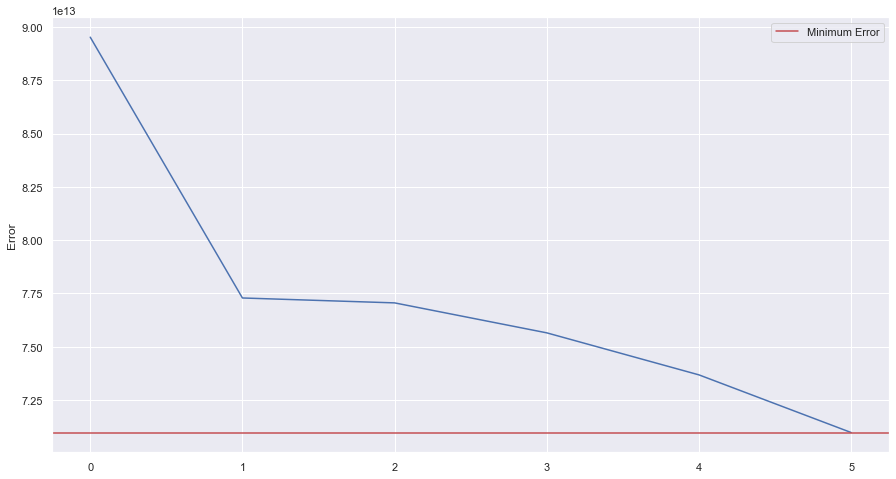

In [73]:
sgd = stochastic_gradient_descent()
sgd.fit(X_train, y_train)

In [74]:
y_hat = sgd.predict(X_test)
rmse(y_hat, y_test)

427853.2396106288

Error minimum:  78959054788419.53


array([-7.38018315e+00,  8.09103302e+00,  9.26972149e+00,  1.36463773e+01,
       -1.48572339e+01,  6.79949330e+00, -1.32213856e+00, -5.93820431e+00,
       -3.59229172e+00,  1.23214956e+00, -4.70232434e+00, -2.25356315e+00,
       -5.56736376e+00,  1.77046232e+00, -4.42867358e+00, -2.49106264e+00,
       -7.20899053e-01, -9.22765468e-01, -5.17421300e-01,  2.81712852e+00,
        4.63401923e+00,  1.32241928e+00,  2.08961405e+00,  1.78712708e+00,
       -7.03081918e-01,  1.29196553e+00, -8.50945926e-02, -1.41292539e-01,
        3.69498322e-01,  1.15996270e+00, -1.65496928e+00,  1.76258204e+00,
       -2.80307583e-03])

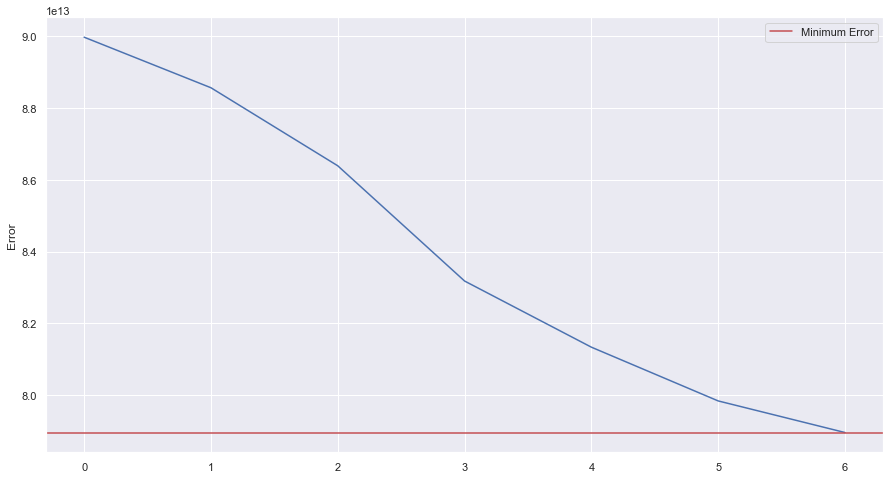

In [75]:
sgd2 = stochastic_gradient_descent()
sgd2.fit(X_train, y_train, alpha=1e-8)

In [76]:
y_hat = sgd2.predict(X_test)
rmse(y_hat, y_test)

483343.36628590623

Error minimum:  83227669424734.06


array([ 5.93839363e-01,  2.32117962e-01,  8.85146432e-01,  1.39404801e-01,
        2.33776212e-01,  3.27953037e-01,  3.09018524e-01,  2.27723314e-01,
        6.64565831e-01,  3.06893968e-01,  9.86747787e-01,  6.24557506e-01,
        6.88958145e-01, -7.62463431e-03,  8.87114401e-01,  1.25547855e-01,
        4.22246218e-02,  9.03504033e-01,  8.07836767e-01,  4.65061167e-01,
        6.76955202e-01,  1.47930558e-01,  1.34945305e-02,  3.04140623e-01,
        5.88068992e-01,  4.47662478e-01,  4.58493644e-01,  4.76619728e-01,
        8.32205519e-01,  8.27324565e-01,  3.23300476e-01,  7.84992052e-02,
        8.62105297e-01,  7.47935864e-01,  1.32519349e+00,  5.22025325e-01,
        5.10325618e-01,  2.18963884e-01,  1.10320077e+00,  9.12168738e-01,
        4.26763484e-01,  3.06562668e-01,  2.92969842e-01,  5.13163373e-01,
        8.32771207e-01,  7.30665610e-01,  8.78639865e-01,  6.57065590e-01,
        6.96013633e-01,  4.88258920e-01,  6.30204719e-01,  6.65457321e-01,
        4.39674127e-01,  

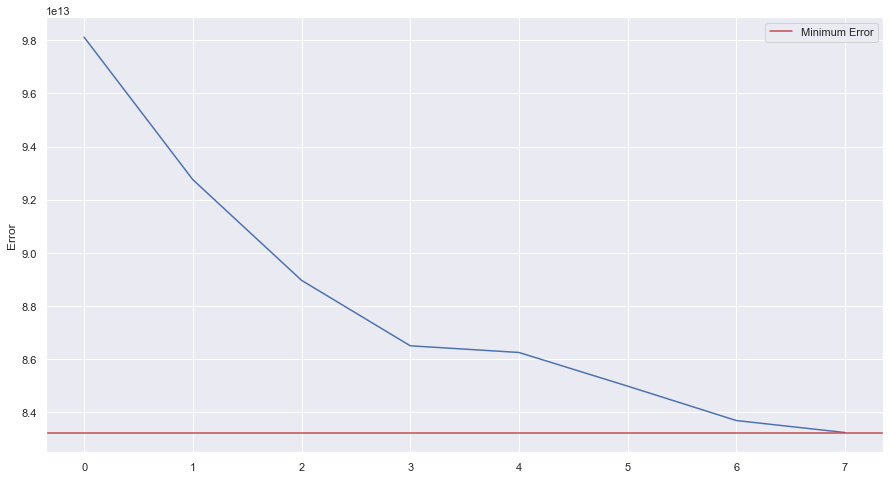

In [77]:
sgd2 = stochastic_gradient_descent()
sgd2.fit(X_train_pol, y_train, alpha=1e-10)

In [78]:
y_hat = sgd2.predict(X_test_pol)
rmse(y_hat, y_test)

483334.701111158

In [79]:
from sklearn.linear_model import SGDRegressor

In [80]:
sgd_reg = SGDRegressor(alpha = 1e-4, max_iter = 50, eta0 = 1e-4)
sgd_reg.fit(X_train, y_train)

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(eta0=0.0001, max_iter=50)

In [81]:
rmse(sgd_reg.predict(X_test), y_test)

164296.42131506928

In [82]:
sgd_reg_pol = SGDRegressor(alpha = 1e-6, max_iter = 50, eta0 = 1e-6, average = True)
sgd_reg_pol.fit(X_train_pol, y_train)

C:\Users\user\anaconda3\envs\nsfs\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1220: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(alpha=1e-06, average=True, eta0=1e-06, max_iter=50)

In [83]:
rmse(sgd_reg_pol.predict(X_test_pol), y_test)

406373.9591838611

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6a455eba-6cdf-4854-aa9d-10411cbe816a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>